./Hokkien_data/iCorpus_train.txt


100%|██████████| 72935/72935 [00:00<00:00, 194102.63it/s]


./Hokkien_data/taigilongthok_all.txt


100%|██████████| 3732/3732 [00:00<00:00, 327745.87it/s]


./Hokkien_data/讀台語學科學.txt


100%|██████████| 581/581 [00:00<00:00, 230656.95it/s]


./Hokkien_data/tw_lyrics.txt


100%|██████████| 373980/373980 [00:00<00:00, 375690.91it/s]


./Hokkien_data/臺語國校仔課本.txt


100%|██████████| 3739/3739 [00:00<00:00, 123138.13it/s]


./Hokkien_data/台灣新眼界_gpt_加標點分段落.txt


100%|██████████| 15344/15344 [00:00<00:00, 262546.10it/s]


./Hokkien_data/寶島鼓仔燈_gpt_加標點分段落.txt


100%|██████████| 13142/13142 [00:00<00:00, 267332.44it/s]


./Hokkien_data/台灣記事簿_gpt_加標點分段落.txt


100%|██████████| 13666/13666 [00:00<00:00, 205402.29it/s]


85579


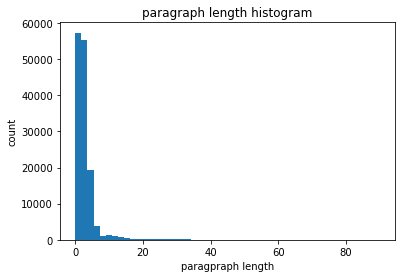

In [2]:
import os
from tqdm import tqdm
import random
import json
import matplotlib.pyplot as plt
directory = "./Hokkien_data"
corpus = []
corpus_lines_count = []
for file in os.listdir(directory):
    if file.endswith(".txt"):
        print(os.path.join(directory, file))
        with open(os.path.join(directory, file), 'r', encoding='UTF-8') as file:
            complete_sentence = []
            for line in tqdm(file.readlines()):
                # normal sentence
                if line!="\n":
                    complete_sentence.append(line[:-1])
                    if line[:-1].endswith("。") or line[:-1].endswith("？") or line[:-1].endswith("！") or line[:-1].endswith("?") or line[:-1].endswith("!"):
                        corpus_lines_count.append(len(complete_sentence))
                        if len(complete_sentence)>1:
                            rand = random.randint(1,len(complete_sentence)-1)
                            data_dict ={"instruction": "This is an example of a Taiwanese sentence: \"駐美特派員曹郁芬華府報導。\". Your job is to finished the given sentence, it should be end with \"。\".  \"自細漢阮就罕得去電頭鬃店予人鉸頭鬃，\":  \"見擺若是學校欲檢查頭毛，阿母就會工課放咧，叫阮三姊弟仔坐踮椅條，逐个人提一張中央挖空的報紙橐咧，聽候阿母「開工」。\"",
                                        "input": "".join(complete_sentence[:rand]),
                                        "output": "".join(complete_sentence[rand:])}
                            corpus.append(data_dict)
                        complete_sentence = []
print(len(corpus))
plt.hist(corpus_lines_count,bins = 50,label=["10","20","30","40","50","60","70","80","90"],range=(0,90))
plt.title("paragraph length histogram")
plt.xlabel("paragpraph length")
plt.ylabel("count")
plt.savefig("paragraph_length_histogram.png")
plt.show()
with open('Hokkien_corpus_new_EN_complete_instruction.json', 'w', encoding='utf-8') as f:
    json.dump(corpus, f, ensure_ascii=False)

In [6]:
corpus[123]

{'instruction': 'This is an example of a Taiwanese sentence: "駐美特派員曹郁芬華府報導。". Your job is to finished the following sentence, it should be end with "。". "警方幾擺向抗議群眾夯牌仔，":  "警方幾擺向抗議群眾夯牌仔，毋過學生並無按算退讓。"',
 'input': 'DalaiLama是佇印度疏幅的山城Dharamsala就是Tibet流亡政府所在地，',
 'output': '向媒體記者表示伊的想法。'}

In [12]:
num_line = set(corpus_lines_count)
d_counts = {}
for num in range(len(num_line)):
    d_counts[num] = corpus_lines_count.count(num)    
print("\t Length \tCount \n  ", "-"*32)
for i in range(len(num_line)):
    print('\t {0:2d}   {1:15d}'.format(list(d_counts.keys())[i], list(d_counts.values())[i]))    

	 Length 	Count 
   --------------------------------
	  0                 0
	  1             57297
	  2             41518
	  3             13884
	  4             14712
	  5              4707
	  6              2439
	  7              1317
	  8              1004
	  9               700
	 10               610
	 11               525
	 12               436
	 13               337
	 14               309
	 15               269
	 16               231
	 17               204
	 18               193
	 19               157
	 20               142
	 21               134
	 22               123
	 23               105
	 24                96
	 25                91
	 26                87
	 27                64
	 28                90
	 29                59
	 30                70
	 31                49
	 32                59
	 33                50
	 34                38
	 35                31
	 36                31
	 37                27
	 38                39
	 39                29
	 40                29
	 41